### Python Script to do long simulation

This python script can be used to generate long time simulation.

In [9]:
import os
from tvb.simulator.lab import *
import numpy as np
import seaborn
import matplotlib.pyplot as plt
LOG = get_logger('demo')
import pickle as cPickle
from tvb.simulator.models.stefanescu_jirsa import ReducedSetHindmarshRose

In [10]:
connectivity.speed = np.array([10.])
length = 1e4
sim = simulator.Simulator(
    model=ReducedSetHindmarshRose(), 
    connectivity=connectivity.Connectivity.from_file(),                      
    coupling=coupling.Linear(a=np.array([0.015])),
    simulation_length=length,
    integrator=integrators.HeunStochastic(dt=0.01220703125, noise=noise.Additive(nsig=np.array([0.00001]), ntau=0.0,
                                                                                random_stream=np.random.RandomState(seed=42))),
    monitors=(
       monitors.TemporalAverage(period=1.),
       monitors.Raw(),
       monitors.ProgressLogger(period=1e2)
    )
).configure()
sim.configure()

WARNING  File 'hemispheres' not found in ZIP.


,value
Type,Simulator
conduction_speed,3.0
connectivity,Connectivity gid: 3c8baa92-bff6-49e9-aee5-78f9023b45bc
coupling,Linear gid: 20d90692-c924-4941-873c-7bbeb6ff84ad
gid,UUID('1aeb396f-0cba-4afd-b5cb-f32c24dd79fc')
initial_conditions,None
integrator,HeunStochastic gid: 6dbd65a4-d9af-4e4b-afc8-66991db3fba4
model,ReducedSetHindmarshRose gid: dccc0ebf-4694-48d7-96cc-c2b0b6ea5ff4
monitors,"(, , )"
simulation_length,10000.0


In [11]:
(tavg_time, tavg_data), (raw_time, raw_data),_ = sim.run()

   INFO  step 1 time 0.0000 s
   INFO  step 8193 time 0.1000 s
   INFO  step 16385 time 0.2000 s
   INFO  step 24577 time 0.3000 s
   INFO  step 32769 time 0.4000 s
   INFO  step 40961 time 0.5000 s
   INFO  step 49153 time 0.6000 s
   INFO  step 57345 time 0.7000 s
   INFO  step 65537 time 0.8000 s
   INFO  step 73729 time 0.9000 s
   INFO  step 81921 time 1.0000 s
   INFO  step 90113 time 1.1000 s
   INFO  step 98305 time 1.2000 s
   INFO  step 106497 time 1.3000 s
   INFO  step 114689 time 1.4000 s
   INFO  step 122881 time 1.5000 s
   INFO  step 131073 time 1.6000 s
   INFO  step 139265 time 1.7000 s
   INFO  step 147457 time 1.8000 s
   INFO  step 155649 time 1.9000 s
   INFO  step 163841 time 2.0000 s
   INFO  step 172033 time 2.1000 s
   INFO  step 180225 time 2.2000 s
   INFO  step 188417 time 2.3000 s
   INFO  step 196609 time 2.4000 s
   INFO  step 204801 time 2.5000 s
   INFO  step 212993 time 2.6000 s
   INFO  step 221185 time 2.7000 s
   INFO  step 229377 time 2.8000 s
   

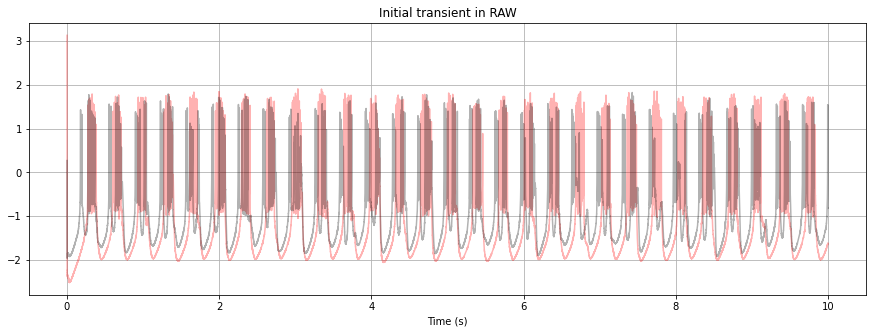

In [16]:
plt.figure(figsize=(15, 5))
plt.plot(raw_time * 1e-3, raw_data[:, 0, 4, 0], "r", alpha=0.3)
plt.plot(raw_time * 1e-3, raw_data[:, 0, 5, 0], "k", alpha=0.3)
plt.title('Initial transient in RAW')
plt.xlabel('Time (s)')
plt.grid(True);